# Importação das bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
#Importação do dataset
df_score = pd.read_csv("score.txt", sep=" ", header=0)

# Detalher sobre o dataset
#### Dados gerados a partir da execução do código de split or steal com alguns agentes aprendendo a jogar por meio de aprendizagem por reforço 

In [5]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   i             330 non-null    int64  
 1   name          330 non-null    object 
 2   total_amount  330 non-null    float64
 3   reward        330 non-null    int64  
 4   type          330 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 13.0+ KB


In [6]:
df_score.describe()

,i,total_amount,reward
count,330.000000,330.000000,330.000000
mean,4.500000,136976.613544,274.445455
std,2.876643,64901.607852,532.443537
min,0.000000,33699.696696,-113.000000
25%,2.000000,86582.039678,0.000000
50%,4.500000,121676.603260,0.000000
75%,7.000000,178361.045424,340.750000
max,9.000000,304182.919032,2186.000000


In [7]:
df_score.head(5)

,i,name,total_amount,reward,type
0,0,Stealer,244601.203211,0,Allgame
1,0,Splitter,121641.576666,0,Allgame
2,0,Pretender,193954.755173,0,Allgame
3,0,Opportunist,130049.794540,0,Allgame
4,0,Karmine,138104.280865,0,Allgame


In [8]:
df_GP_1=df_score.where(df_score["name"] == "GP_agent_1").dropna().reset_index(drop=True) # DF contendo apenas o agente 01

# Gráficos do Agente 1

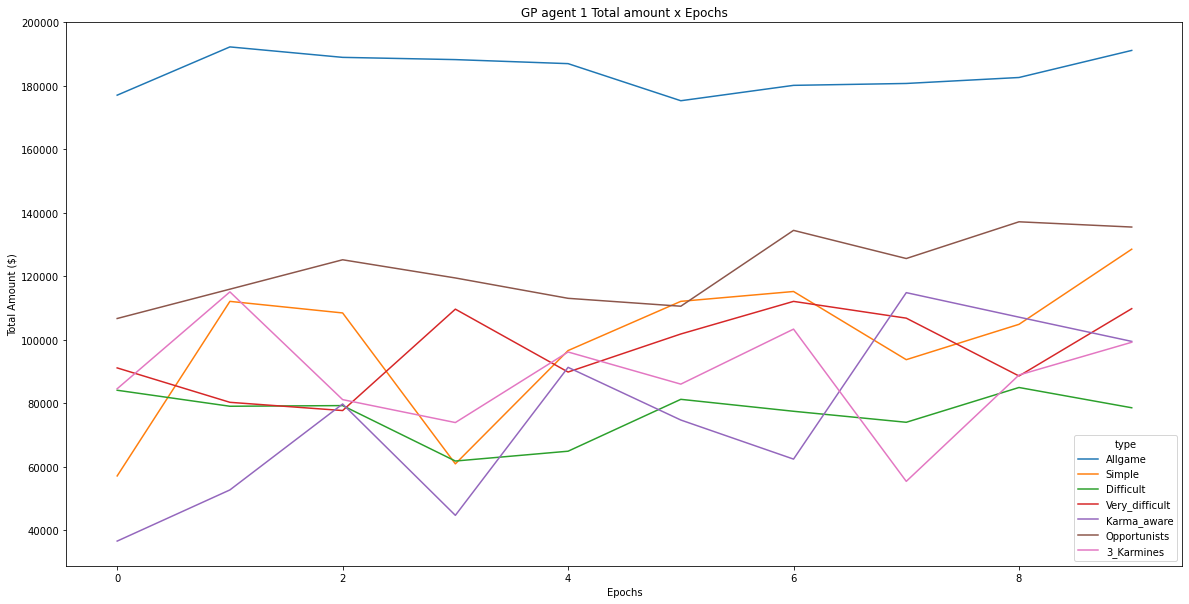

In [11]:
# pivot the data into the correct shape
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'total_amount', hue = 'type', ci=None)
plt.title("GP agent 1 Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()


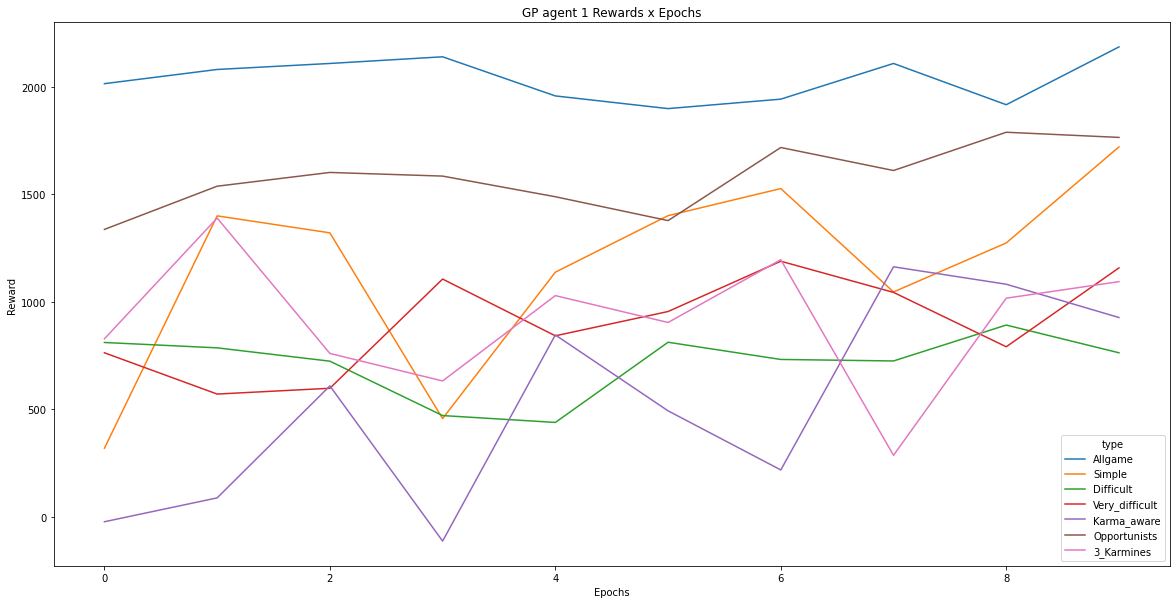

In [12]:
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'reward', hue = 'type',ci=None)
plt.title("GP agent 1 Rewards x Epochs")
plt.ylabel("Reward")
plt.xlabel("Epochs")
plt.show()

# Gráficos de todos o agentes

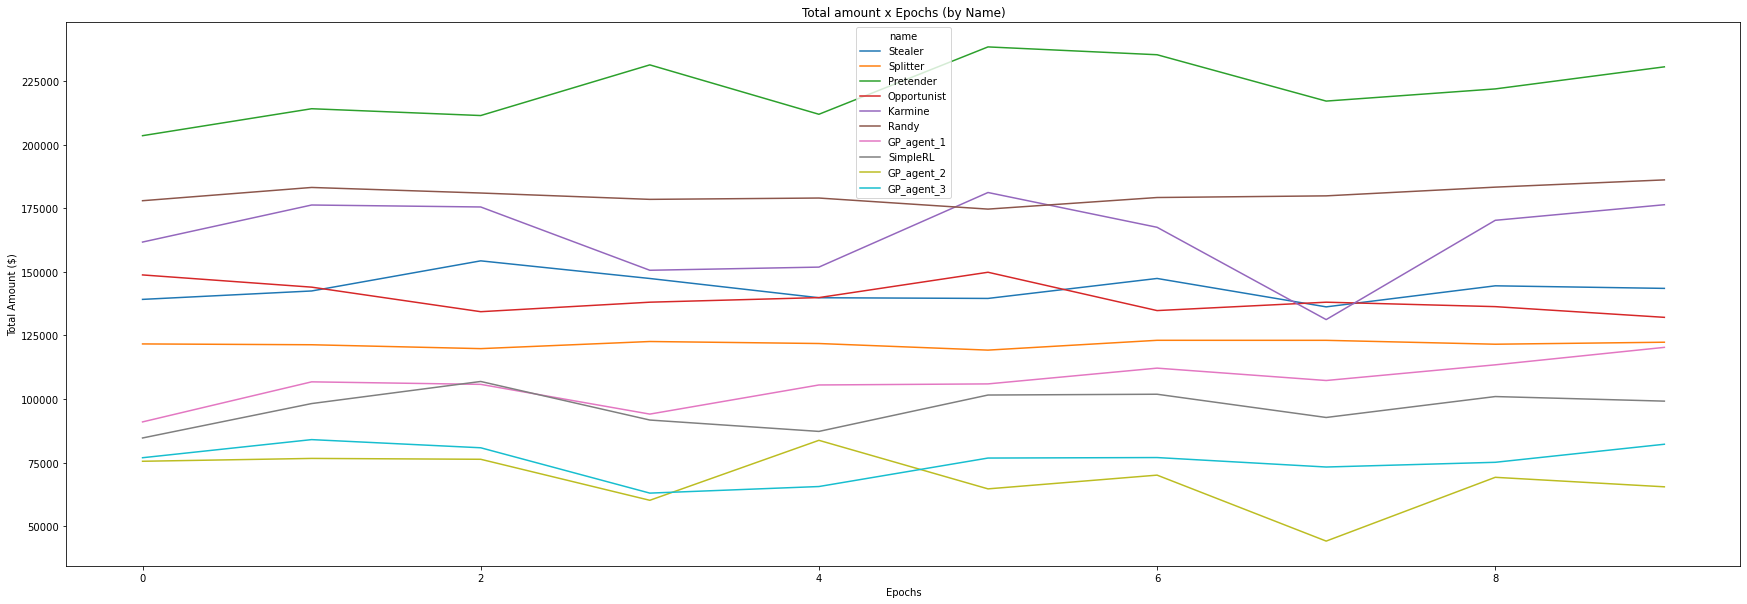

In [13]:
plt.figure(figsize=(30,10))
sn.lineplot(data = df_score, x = "i", y = 'total_amount', hue = 'name', ci=None)
plt.title("Total amount x Epochs (by Name)")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()

In [14]:
#Criação de datasets filtrados por tipo de jogo
df_Allgame=df_score.where(df_score["type"] == "Allgame").dropna().reset_index(drop=True)
df_Simple=df_score.where(df_score["type"] == "Simple").dropna().reset_index(drop=True)
df_Difficult=df_score.where(df_score["type"] == "Difficult").dropna().reset_index(drop=True)
df_Very_difficult=df_score.where(df_score["type"] == "Very_difficult").dropna().reset_index(drop=True)
df_Karma_aware=df_score.where(df_score["type"] == "Karma_aware").dropna().reset_index(drop=True)
df_Opportunists=df_score.where(df_score["type"] == "Opportunists").dropna().reset_index(drop=True)
df_3_Karmines=df_score.where(df_score["type"] == "3_Karmines").dropna().reset_index(drop=True)

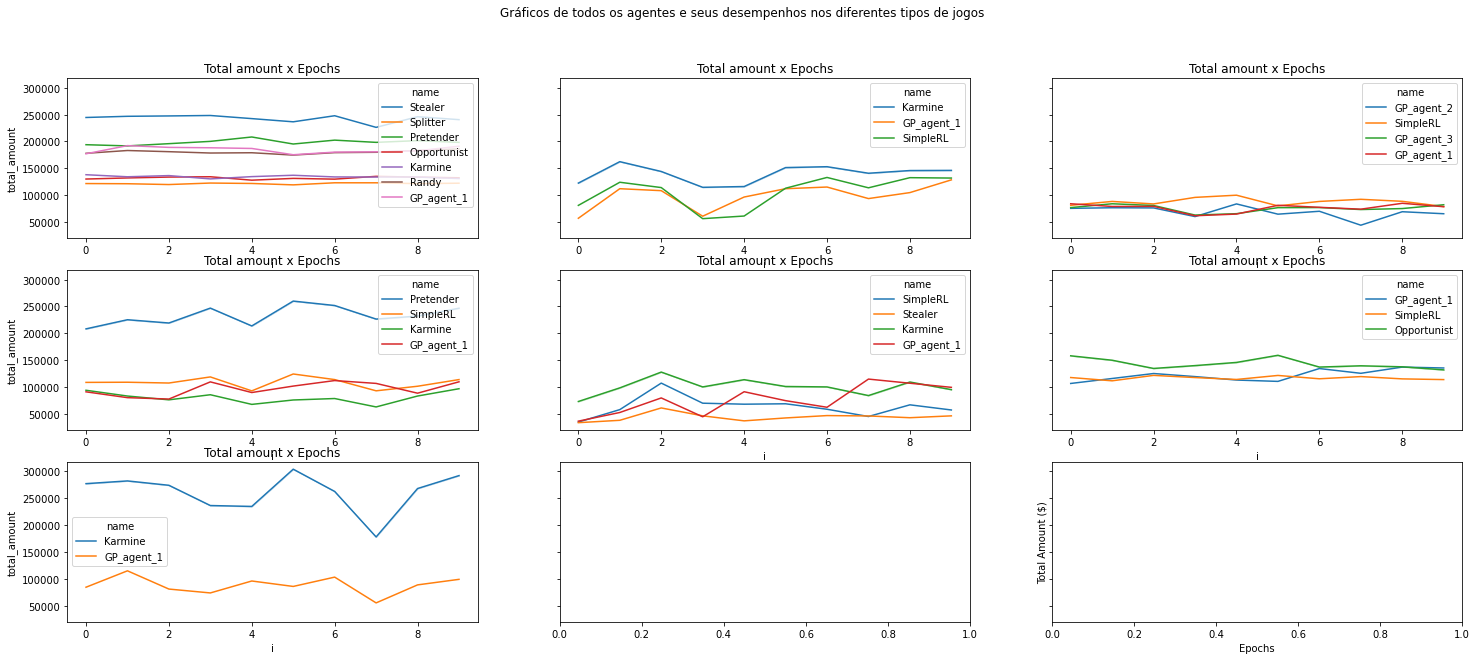

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Gráficos de todos os agentes e seus desempenhos nos diferentes tipos de jogos')

sn.lineplot(ax=axes[0, 0],data = df_Allgame, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 1],data = df_Simple, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 2],data = df_Difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 0],data = df_Very_difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 1],data = df_Karma_aware, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 2],data = df_Opportunists, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[2, 0],data = df_3_Karmines, x = "i", y = 'total_amount', hue = 'name')
axes[0][0].set_title("Total amount x Epochs")
axes[0][1].set_title("Total amount x Epochs")
axes[0][2].set_title("Total amount x Epochs")
axes[1][0].set_title("Total amount x Epochs")
axes[1][1].set_title("Total amount x Epochs")
axes[1][2].set_title("Total amount x Epochs")
axes[2][0].set_title("Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()